<a href="https://colab.research.google.com/github/andresalesbarbosa/ml-scratch/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

*André Sales Barbosa*
Last update: *January 2019*

## Introduction
The objective of this notebook is to code the simple and multilinear forms of linear regression, and use this experience to understand some of the proprieties of this model.

In [0]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1234)  # Set seed for reproducibility

# Parameters
real_beta_0 = 5
real_beta_1 = 2
real_sigma2 = 1

# Sample size
n = 100

# Generate data
x = np.linspace(0,5,n)
y = real_beta_0 + real_beta_1*x + real_sigma2 * np.random.randn(n)


Here we can see the data we generate

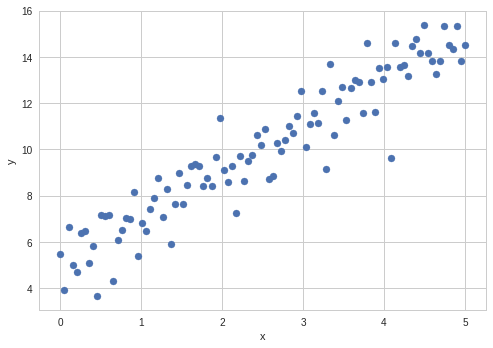

In [15]:
# Plot data
sns.set_style("whitegrid")
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

## Simple Linear Regression

This model takes the form $$Y = \beta_0 + \beta_1 x + \epsilon $$

This formula represents the reductible error, which we are modelling as $ \beta_0 + \beta_1 x$ and the irreductible error $\epsilon$, this represent erros from data generation, data reading, modeling, features that are not described in this model, summing are erros we can not address with the model we chose.

---

To determine how to resolve this model, we must choose a metric of error, in this case, Residual Sum of Squares (RSS).

$$ RSS = \sum_{i =0}^n (y_i - \hat{y_i} )^2$$
$$ RSS = \sum_{i =0}^n (y_i - (\beta_0 + \beta_1x_i))^2$$

We would like that our error was null or the least possible, and so we must solve this minimization problem in $\beta_0$ e $\beta_1$ in order to find parameters that minimize this function.

$$ \hat{\beta_0},\hat{\beta_1} =  \frac{argmin}{\beta_0,\beta_1} \sum_{i =0}^n (y_i - (\beta_0 + \beta_1x_i))^2 $$ 

This can be proved to yield a closed form solution like:

$$ \hat{\beta_0} = \bar{y}- \hat{\beta_1}\bar{x} $$
$$ \hat{\beta_1} = \frac{\sum_{i=1}^{n}y_i(x_i - \bar{x})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} $$

In this notebook I'm going to use this closed form as a comparative of the correctness of the model.

---

## Gradient Descent

"Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point. If, instead, one takes steps proportional to the positive of the gradient, one approaches a local maximum of that function; the procedure is then known as gradient ascent. " [[wikipedia](https://en.wikipedia.org/wiki/Gradient_descent)]

 ![Graphical form of the algorithm [source Hackernoon](https://hackernoon.com/gradient-descent-aynk-7cbe95a778da)](https://cdn-images-1.medium.com/max/1600/0*rBQI7uBhBKE8KT-X.png)
 
 Our objective in this section is to implement a simple gradient descent and find the optimum parameters $\beta_0,\beta_1$ which minimize our error. 
 
 The algorithm is composed of X steps:
 

1.   Initialize the parameters with 0 or random numbers
2.   Iterate until convergence
  1.   Calculate the function $ f $ for the actual parameters
  2.   Calculate the gradient ($\nabla$) of $ f $ for each parameter
  3.   Update the parameter as following
  $$ W \leftarrow W - \alpha\nabla $$
  
We must define what is convergence. I am going to consider that the model converged after 1000 iterations or if the diference between both new parameters and old parameters are less than *precision*.





In [65]:
# step 1
beta_0 = np.random.rand(1)
beta_1 = np.random.rand(1)
n = x.shape[0]
y_hat = np.zeros(n)
alpha = 0.001
iter = 10000
precision = 0.0001

#step2

for i in range(iter):
  prev_beta_0 = beta_0
  prev_beta_1 = beta_1
  y_hat = prev_beta_0 + prev_beta_1*x
  grad_beta_0 = -2*np.sum(y - y_hat)
  grad_beta_1 = -2*np.sum(x*(y - y_hat))
  beta_0 = prev_beta_0 - alpha*(grad_beta_0)
  beta_1 = prev_beta_1 - alpha*(grad_beta_1)
  if (np.abs(beta_0 - prev_beta_0) < precision) and (np.abs(beta_1 - prev_beta_1) < precision):
    print("stoped at iteration {}".format(i))
    break

print('Estimated beta_0 {:.4f}'.format(beta_0[0]))
print('Estimated beta_1 {:.4f}'.format(beta_1[0]))

stoped at iteration 159
Estimated beta_0 5.0676
Estimated beta_1 1.9868


In [70]:
#closed form

cl_beta_1 = np.sum(y * (x - np.mean(x)))/ np.sum((x - np.mean(x))**2)
cl_beta_0 = np.mean(y) - cl_beta_1*np.mean(x)

print("Closed form beta_0: {:.4f}".format(cl_beta_0))
print("Closed form beta_1: {:.4f}".format(cl_beta_1))

print("Diference between Closed form and Gradient Descent beta_0: {:.2f}%".format(100*np.abs(cl_beta_0 - beta_0)[0]/cl_beta_0))
print("Diference between Closed form and Gradient Descent beta_1: {:.2f}%".format(100*np.abs(cl_beta_1 - beta_1)[0]/cl_beta_1))


Closed form beta_0: 5.0696
Closed form beta_1: 1.9862
Diference between Closed form and Gradient Descent beta_0: 0.04%
Diference between Closed form and Gradient Descent beta_1: 0.03%


Text(0.5, 1.0, 'f(x) = 5.07 + 1.99x')

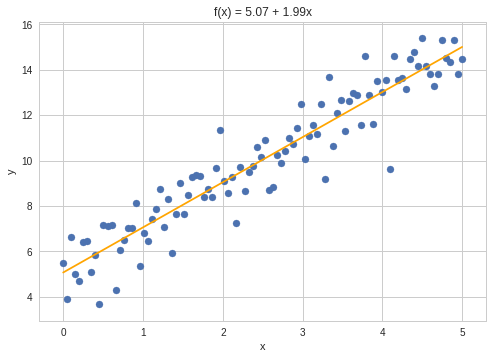

In [85]:
# Plot data
sns.set_style("whitegrid")
plt.plot(x, y_hat, color="orange")
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("f(x) = {:.2f} + {:.2f}x".format(beta_0[0], beta_1[0]))

## Coefficient of Determination

This metric is used to determine how much of our target variable is explained by our model. This metric has an instrinsic problem that as the number of features used in the model expand, the coefficient increase as well, but not always associated with the real explanation of the target variance.

$$ R^2 = 1 - \frac{\sum{(y - \hat{y})^2}}{\sum{(y - \bar{y})^2}}$$

A curious fact about this metric, if the model prediction is lower than the mean of target, even though this coefficient is treated as the % of variance explanantion, it can get lower than 0.

In [86]:
# Calculating the coefficient of determination
def rsquare(y,y_hat):
  return 1 - (np.sum((y - y_hat)**2)/np.sum((y - np.mean(y))**2))

r2 = rsquare(y,y_hat)
'The coefficient of determination (R2) for the example is {:.2f}.'.format(r2)

'The coefficient of determination (R2) for the example is 0.89.'

## Multivariate 

Now we expand our model to include more dimensions. This will change our earlier formulas to a matrix form, but as the concept will not change, that will not be described here at this moment. I am going to change our variables to a mutivariate problem with two features as following

$$ Y = \beta_0 + \beta_1x_1 + \beta_2x_2+ \epsilon$$
$$ f(x_1,x_2) = \beta_0 + \beta_1x_1 + \beta_2x_2$$

Our error metric, and loss function, remains the same

$$ RSS = \sum{(y - \hat{y})²}$$

In [0]:
# Parameters
real_beta_0 = 5
real_beta_1 = 2
real_beta_2 = 3
real_sigma2 = 1

# Sample size
n = 100

# Generate data
x_1 = np.linspace(0,5,n)
x_2 = np.linspace(0,5,n)
y = real_beta_0 + real_beta_1*x_1 + real_beta_2*x_2 + real_sigma2 * np.random.randn(n)
y=y.reshape(n,1)

In [253]:
# step 1

beta = np.random.rand(3).reshape(3,1)
n = x_1.shape[0]
x_0 = np.ones(n)
X = np.hstack((x_0.reshape(n,1),x_1.reshape(n,1),x_2.reshape(n,1)))

y_hat = np.zeros(n)
alpha = 0.0001
iter = 100000
precision = 0.000001

#step2


for i in range(iter):
  prev_beta = beta
  y_hat = np.dot(X,prev_beta)
  grad_beta = -2*X.T@(y - y_hat)
  beta = prev_beta - alpha*(grad_beta)
  if (np.all(np.abs(beta - prev_beta) < precision)):
    print("stoped at iteration {}".format(i))
    break
    
for i in range(beta.shape[0]):
  print('Estimated beta {} : {:.4f}'.format(i,beta[i,0]))

stoped at iteration 2004
Estimated beta 0 : 4.7315
Estimated beta 1 : 2.0971
Estimated beta 2 : 2.9816


In [254]:
# Calculating the coefficient of determination
r2 = rsquare(y,y_hat)
'The coefficient of determination (R2) for the example is {:.2f}.'.format(r2)

'The coefficient of determination (R2) for the example is 0.98.'